### Question 21.6 
Integrate the following function both analytically and numerically. Use both the trapezoidal and Simpson’s 1/3 rules to numerically integrate the function. For both cases, use the multiple-application version, with n = 4. Compute percent relative errors for the numerical results.

$\int_0^3 \mathrm{x}^{2} \mathrm{e}^{x}\mathrm{d}x$


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

### Multiple-Application Trapezoidal Rule

In [2]:
def real_integral(F, a, b):
    """
    Calculate integral of f based on PT6.1 in Numerical Methods Book
    F(x)(a-b) = F(b) - F(a) 
    """
    I = F(b) - F(a) 
    return I
    
def multi_trapezoidal(f, F, a, b, n):
    """
    f: function of x
    F: integral function of x
    a: lower value of Integral
    b: upper value of Integral
    n: number of segments for multiple-application calculation
    """
    #print(f(0))
    xs = [a]
    h = (b-a)/n
    
    for _ in range(n):
        xs.append(round(xs[-1] + h, 4))
    print('x values: ', xs)
     
    ys = []
    for x in xs:
        ys.append(round(f(x),4))
       
    print('f values: ', ys)
    m = len(ys)
    
    #print(sum(ys[1:m-1]))
    
    integral = real_integral(F, a, b)
    I = (b - a)*(ys[0] + 2*sum(ys[1:m-1]) + ys[-1])/(2*n)
    print(f'Real integral: {integral}, Calculated integral by multi_trapezoidal: {I}')
    
    Et = round(integral - I, 2)
    et = round(Et*100/integral,2)
    
    print(f'Absolute Errors: {Et}, Percent Relative Error: {et}%')

#### -> Apply multi_trapezoidal on Textbook example

In [3]:
def f(x):
    return 0.2 + 25*x - 200*(x**2) + 675*(x**3) - 900*(x**4) + 400*(x**5)

def F(x):
    return 0.2*x + 25/2*(x**2) - 200/3*(x**3) + 675/4*(x**4) - 900/5*(x**5) + 400/6*(x**6)

multi_trapezoidal(f, F, 0, 0.8, 2)

x values:  [0, 0.4, 0.8]
f values:  [0.2, 2.456, 0.232]
Real integral: 1.6405333333333374, Calculated integral by multi_trapezoidal: 1.0688000000000002
Absolute Errors: 0.57, Percent Relative Error: 34.74%


#### -> Apply multi_trapezoidal on question 21.6

In [4]:
def f(x):
    return (x**2)*(math.exp(x))

def F(x):
    return (x**2 - 2*x + 2)*(math.exp(x))

multi_trapezoidal(f, F, 0, 3, 4)

x values:  [0, 0.75, 1.5, 2.25, 3.0]
f values:  [0.0, 1.1908, 10.0838, 48.0317, 180.7698]
Real integral: 98.42768461593835, Calculated integral by multi_trapezoidal: 112.26840000000001
Absolute Errors: -13.84, Percent Relative Error: -14.06%


### Multiple-Application Version of Simpson’s 1/3 Rule

In [5]:
def real_integral(F, a, b):
    """
    Calculate integral of f based on PT6.1 in Numerical Methods Book
    F(x)(a-b) = F(b) - F(a) 
    """
    I = F(b) - F(a) 
    return I

def multiple_simpson13_rule(f, F, a, b, n):
    """
    f: function of x
    F: integral function of x
    a: lower value of Integral
    b: upper value of Integral
    n: number of segments for multiple-application calculation
    """
    xs = [a]
    h = (b-a)/n
    
    for _ in range(n):
        xs.append(round(xs[-1] + h, 4))
    print('x values: ', xs)
     
    ys = []
    for x in xs:
        ys.append(round(f(x),4))
       
    print('f values: ', ys)
    m = len(ys)
    
    integral = real_integral(F, a, b)
    
    sum_odd, sum_even = 0, 0
    for i in range(1, m-1, 2):
        sum_odd += ys[i]
    print('Sum of elements in odd positions: ', sum_odd)
        
    for i in range(2, m-1, 2):
        sum_even += ys[i]
    print('Sum of elements in even positions: ', sum_even)
        
    I = (b - a)*(ys[0] + 4*sum_odd + 2*sum_even + ys[-1])/(3*n)
    
    print(f'Real integral: {integral}, Calculated integral by multiple_simpson13_rule: {I}')
    
    Et = round(integral - I, 4)
    et = round(Et*100/integral, 4)
    
    print(f'Absolute Error: {Et}, Percent Relative Error: {et}%')

#### -> Apply multiple_simpson13_rule on Textbook example

In [6]:
def f(x):
    return 0.2 + 25*x - 200*(x**2) + 675*(x**3) - 900*(x**4) + 400*(x**5)

def F(x):
    return 0.2*x + 25/2*(x**2) - 200/3*(x**3) + 675/4*(x**4) - 900/5*(x**5) + 400/6*(x**6)

multiple_simpson13_rule(f, F, 0, 0.8, 4)

x values:  [0, 0.2, 0.4, 0.6, 0.8]
f values:  [0.2, 1.288, 2.456, 3.464, 0.232]
Sum of elements in odd positions:  4.752
Sum of elements in even positions:  2.456
Real integral: 1.6405333333333374, Calculated integral by multiple_simpson13_rule: 1.6234666666666666
Absolute Error: 0.0171, Percent Relative Error: 1.0423%


#### -> Apply multiple_simpson13_rule on question 21.6

In [7]:
def f(x):
    return (x**2)*(math.exp(x))

def F(x):
    return (x**2 - 2*x + 2)*(math.exp(x))

multiple_simpson13_rule(f, F, 0, 3, 4)

x values:  [0, 0.75, 1.5, 2.25, 3.0]
f values:  [0.0, 1.1908, 10.0838, 48.0317, 180.7698]
Sum of elements in odd positions:  49.222500000000004
Sum of elements in even positions:  10.0838
Real integral: 98.42768461593835, Calculated integral by multiple_simpson13_rule: 99.45684999999999
Absolute Error: -1.0292, Percent Relative Error: -1.0456%


**From the above calculations and comparison, we can see that multiple_simpson13_rule actually did a better job than multi_trapezoidal in estimating integral of functions**

------------------
### Question 21.10
21.10 Evaluate the integral of the following tabular data with (a) the trapezoidal rule and (b) Simpson’s rules:

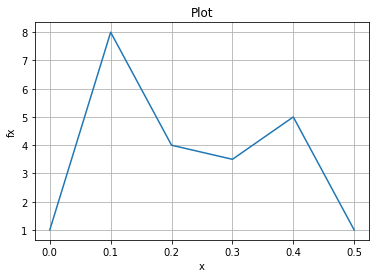

In [8]:
x = [0,0.1,0.2,0.3,0.4,0.5]
fx = [1, 8, 4, 3.5, 5, 1]
n = len(x)-1
fig, ax = plt.subplots()
ax.plot(x, fx)

ax.set(xlabel='x', ylabel='fx', title="Plot")
ax.grid()

plt.show()

In [9]:
def multi_trapezoidal_tabular(x, fx, a, b, n):
    """
    x: values of x
    fx: function of x
    a: lower value of Integral
    b: upper value of Integral
    n: number of segments for multiple-application calculation
    """
    xs = x
    print('x values: ', xs)
     
    ys = fx
    print('f values: ', ys)
    m = len(ys)
    
    I = (b - a)*(ys[0] + 2*sum(ys[1:m-1]) + ys[-1])/(2*n)
    print(f'Calculated integral by multi_trapezoidal: {I}')

In [10]:
multi_trapezoidal_tabular(x, fx, x[0], x[-1], n)

x values:  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
f values:  [1, 8, 4, 3.5, 5, 1]
Calculated integral by multi_trapezoidal: 2.15


In [11]:
def multiple_simpson13_tabular(f, F, a, b, n):
    """
    x: values of x
    fx: function of x
    a: lower value of Integral
    b: upper value of Integral
    n: number of segments for multiple-application calculation
    """   
    xs = x
    print('x values: ', xs)
     
    ys = fx
    print('f values: ', ys)
    print('Segments: ', n)
    m = len(ys)
    
    sum_odd, sum_even = 0, 0
    for i in range(1, m-1, 2):
        #print(ys[i])
        sum_odd += ys[i]
    print('Sum of elements in odd positions: ', sum_odd)
        
    for i in range(2, m-1, 2):
        sum_even += ys[i]
    print('Sum of elements in even positions: ', sum_even)
        
    I = (b - a)*(ys[0] + 4*sum_odd + 2*sum_even + ys[-1])/(3*n)
    
    print(f'Calculated integral by multiple_simpson13_rule: {I}')

In [12]:
multiple_simpson13_tabular(x, fx, x[0], x[-1], n)

x values:  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
f values:  [1, 8, 4, 3.5, 5, 1]
Segments:  5
Sum of elements in odd positions:  11.5
Sum of elements in even positions:  9
Calculated integral by multiple_simpson13_rule: 2.2
